Osnabrück University - Computer Vision (Winter Term 2022/23) - Prof. Dr.-Ing. G. Heidemann, Ulf Krumnack

# Exercise Sheet 04: Segmentation

## Introduction

This week's sheet should be solved and handed in before the end of **Sunday, December 4th, 2022**. If you need help (and Google and other resources were not enough), feel free to contact your groups' designated tutor or whomever of us you run into first. Please upload your results to your group's Stud.IP folder.

## Assignment 0: Math recap (the exponential function) [0 Points]

This exercise is supposed to be basic (but maybe less familiar than the last one), does not give any points, and is voluntary. There will be a similar exercise on every sheet. It is intended to revise some basic mathematical notions that are assumed throughout this class and to allow you to check if you are comfortable with them. Usually you should have no problem to answer these questions offhand, but if you feel unsure, this is a good time to look them up (again). You are always welcome to discuss questions with the tutors or in the practice session. Also, if you have a (math) topic you would like to recap, please let us know.

**a)** What is an *exponential function*? How can it be characterized? What is special about $e^x$?

YOUR ANSWER HERE

**b)** How is the exponential function defined for complex arguments? In what way(s) does this generalize the real case?

YOUR ANSWER HERE

**c)** The complex exponential function allows to define a mapping $\mathbb{R}\to\mathbb{C}$ by $x\mapsto e^{ix}$? How does the graph of this mapping look like? Where are the points $e^{2\pi i\frac mn}$ for $m=0,...,n\in\mathbb{N}$ located on this graph?

YOUR ANSWER HERE

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

## Assignment 1: Color perception and color spaces (5 points)

### a) Human color perception

Explain how human color perception works, that is, how light of different frequencies (and mixtures of different frequencies) is perceived as different colors.
Then discuss what light sources/frequencies could be used to induce the perception of the following colors?
* orange
* brown
* purple
* white

YOUR ANSWER HERE

### b) Additive and subtractive color mixing

Explain the ideas of additive and subtractive color mixing. Name examples for each mixing model and describe technical applications.

YOUR ANSWER HERE

### c) RGB and HSV color space

Compare the RGB and the HSV color spaces. Name advantages and discuss suitable applications for each of them.

YOUR ANSWER HERE

## Assignment 2: Histogram-based segmentation (5 points)

### a) Histogram-based segmentation

What is histogram-based segmentation? What are it's goals, benefits, and problems?

YOUR ANSWER HERE

### b) Threshold computation

There exist different methods to automatically determine a threshold for an image. Find at least two that are provided by scikit-image and describe them in more detail. Then apply them to the images `schrift.png` and `pebbles.jpg`.

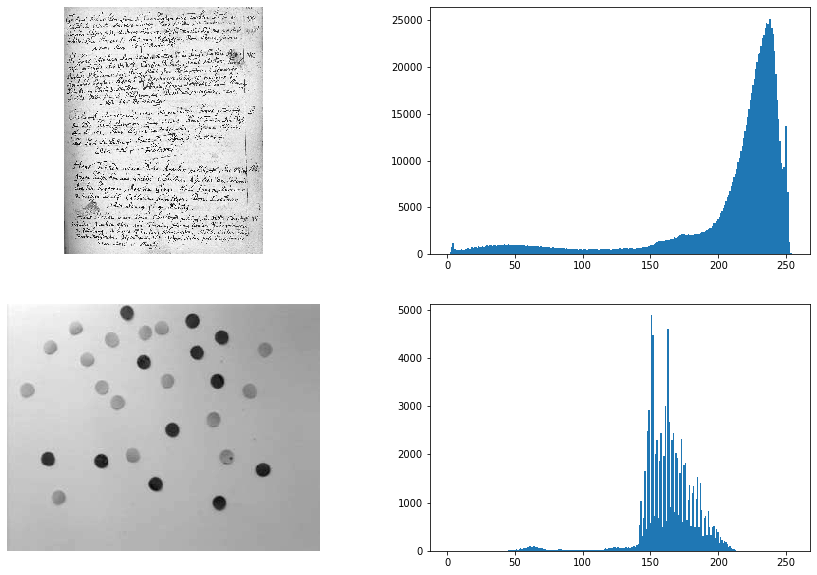

In [3]:
# Run this cell to get an impression of how the histograms look

%matplotlib inline
import matplotlib.pyplot as plt
from imageio import imread

img1 = imread('images/schrift.png')
img2 = imread('images/pebbles.jpg') 

plt.figure(figsize=(15, 10)) 
plt.gray()
plt.subplot(2,2,1)
plt.axis('off')
plt.imshow(img1)
plt.subplot(2,2,2)
plt.hist(img1.flatten(), 256, (0, 255))
plt.subplot(2,2,3)
plt.axis('off')
plt.imshow(img2)
plt.subplot(2,2,4)
plt.hist(img2.flatten(), 256, (0, 255))
plt.show()

In [1]:
# Run this cell to get an impression of how the histograms look

%matplotlib inline
import matplotlib.pyplot as plt
from imageio.v3 import imread

img1 = imread('images/schrift.png')
img2 = imread('images/pebbles.jpg') 

plt.figure(figsize=(15, 10)) 
plt.gray()
plt.subplot(2,2,1)
plt.axis('off')
plt.imshow(img1)
plt.subplot(2,2,2)
plt.hist(img1.flatten(), 256, (0, 255))
plt.subplot(2,2,3)
plt.axis('off')
plt.imshow(img2)
plt.subplot(2,2,4)
plt.hist(img2.flatten(), 256, (0, 255))
plt.show()

ModuleNotFoundError: No module named 'imageio.v3'

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from imageio import imread

img = imread('images/pebbles.jpg') # 'pebbles.jpg' or 'schrift.png'

# YOUR CODE HERE
raise NotImplementedError()

plt.figure(figsize=(15, 10))
plt.gray()
plt.subplot(3,1,1); plt.axis('off'); plt.imshow(img)
plt.subplot(3,1,2); plt.hist(img.flatten(), 256, (0,255))
plt.axvline(thresh, color='r')
plt.subplot(3,1,3); plt.axis('off'); plt.imshow(segments)
plt.show()

### c) Shading

Shading may cause a problem to histogram based segmentation. In the lecture (CV-07 slide 13), it was proposed to compute a shading image to deal with that problem. Apply this approach to the images `schrift.png` and `pebbles.jpg`. You may use filter functions from scikit-image for this exercise.

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from imageio.v3 import imread

img = imread('images/schrift.png').astype(float)/255
#img = imread('images/pebbles.png').astype(float)/255

# YOUR CODE HERE
raise NotImplementedError()

## Assignment 3: Pyramid representation (5 points)

**a)** What is the *Gaussian pyramid*? How does the **reduce** operation work? Explain in your own words what low pass filtering is and why it should be used when building the pyramid? Implement the **reduce** operation and generate a figure similar to the one on (CV-07 slide 32).

The image can be represented on multiple scales. When making this with Gaussian filter, it is the Gaussian pyramid. Different scales can be computed by reduce operation, which makes four pixels in level *i* be one pixel in level *i+1*. With reduce operation, level *i+1* will get 1/4 size of level *i*. Before reducing, low pass filtering, Gaussian filter, is required because low pass filtering will make the image smooth so that avoid the pixels of reduced image having artifacts.

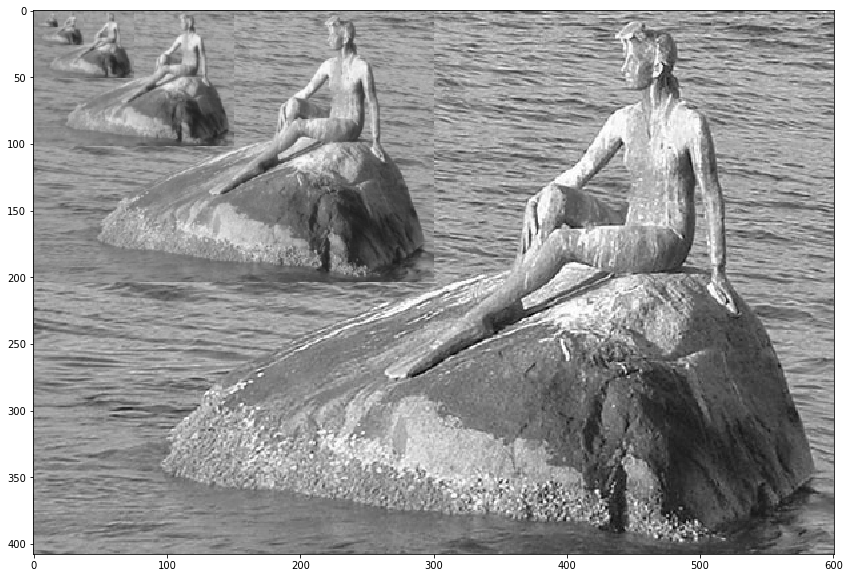

In [3]:
%matplotlib inline
import numpy as np
from scipy import ndimage
import matplotlib.pyplot as plt
from imageio import imread

img = imread('images/mermaid.png')

pyramid_image = img.copy()
binomial_filter = 1/256 * np.asarray([[1, 4, 6, 4, 1],
                                     [4, 16, 24, 16, 4],
                                     [6, 24, 36, 24, 6],
                                     [4, 16, 24, 16, 4],
                                     [1, 4, 6, 4, 1]])
size = img.shape

steps = 5 # number of reduce-iteration
for i in range(steps) :
    # low pass filtering
    filtered_temp = ndimage.convolve(pyramid_image[:size[0],:size[1]], binomial_filter)
    reduced_size = ((size[0]+1)//2, (size[1]+1)//2)
    for x in range(reduced_size[0]) :
        for y in range(reduced_size[1]) :
            temp = np.array(filtered_temp[2*x][2*y])
            if (2*x+1<=size[0]-1) :
                np.append(temp, filtered_temp[2*x+1][2*y])            
                if (2*y+1<=size[1]-1) :
                    np.append(temp, filtered_temp[2*x+1][2*y+1])
            else :
                np.append(temp, filtered_temp[2*x][2*y+1])  
            pyramid_image[x][y] = temp.mean()    
    size = reduced_size
    
plt.figure(figsize=(15,10))
plt.gray()
plt.imshow(pyramid_image)
plt.show()

**b)** What is the **expand** operation? Why can the **reduce** operation not be inverted? Implement (not using the library function;-) the **expand** operation and generate an image similar to the one on (CV-07 slide 34).

Remark: for producing the final image, do not start with the original image, but with a reduced version.

Expand operation makes the image bigger. If the image of level *i* has M * N size, the image of level *i+1* will get 2M * 2N size. For this operation, we need to interpolate the empty pixel in level *i+1*. Because reduce operation already make the image smaller, it cannot be converted.

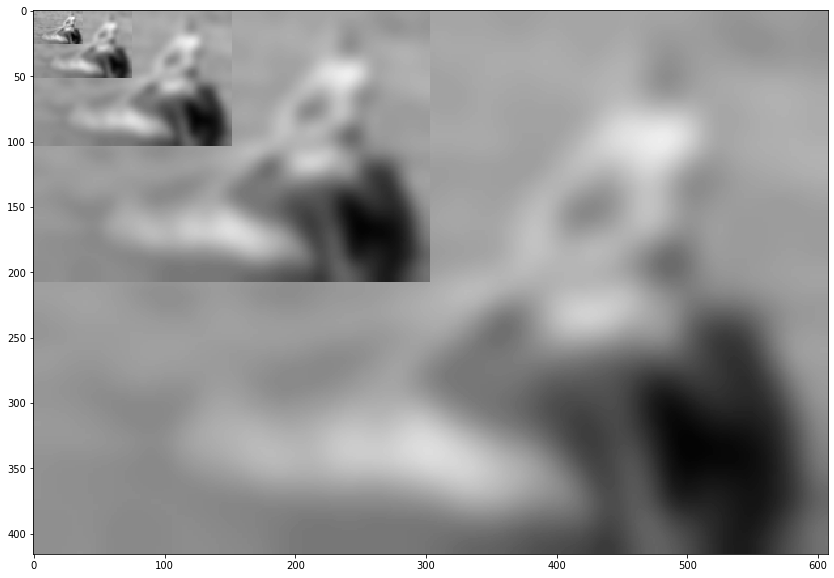

In [7]:
%matplotlib inline
import numpy as np
from scipy import ndimage
import matplotlib.pyplot as plt
from imageio import imread
import cv2

img = imread('images/mermaid.png')
steps = 4

# make image reduced
for i in range(steps) :
    img = cv2.pyrDown(img)

pyramid_image = np.zeros((img.shape[0] * (2 ** steps), img.shape[1] * (2 ** steps)))
pyramid_image[:img.shape[0],:img.shape[1]] = img
binomial_filter = 1/256 * np.asarray([[1, 4, 6, 4, 1],
                                     [4, 16, 24, 16, 4],
                                     [6, 24, 36, 24, 6],
                                     [4, 16, 24, 16, 4],
                                     [1, 4, 6, 4, 1]])

for i in range(steps):
    new_image = np.zeros((img.shape[0]*2, img.shape[1]*2), np.uint8)
    for x in range(img.shape[0]) :
        for y in range(img.shape[1]) :
            new_image[2*x][2*y] = img[x][y]
            new_image[2*x][2*y+1] = img[x][y]
            new_image[2*x+1][2*y] = img[x][y]
            new_image[2*x+1][2*y+1] = img[x][y]

    new_image = ndimage.convolve(new_image, binomial_filter)
    pyramid_image[:img.shape[0],img.shape[1]:new_image.shape[1]] = new_image[:img.shape[0],img.shape[1]:new_image.shape[1]]
    pyramid_image[img.shape[0]:new_image.shape[0],:new_image.shape[1]] = new_image[img.shape[0]:new_image.shape[0],]
    img = new_image


plt.figure(figsize=(15,10))
plt.gray()
plt.imshow(pyramid_image)
plt.show()

**c)** What is the *Laplacian pyramid*? What is it used for? Compute the Laplacian pyramid and generate an image similar to the one on (CV-07 slide 36).

With Laplacian pyramid, we can check what we lost. To compute it, first reduce the image and expand it again. Then we will get blurred image. Difference between this blurred image and original image is one level of Laplacian pyramid.

In [9]:
%matplotlib inline
import numpy as np
from scipy import ndimage
import matplotlib.pyplot as plt
from imageio import imread
import cv2

image = imread('images/mermaid.png')
gaussian = []  

gaussian_layer= image.copy() 
steps = 4 # number of reduce-iteration

for i in range(steps) :
    reduced_image = cv2.pyrDown(gaussian_layer)
    exp_red_image = cv2.pyrUp(reduced_image, dstsize=size)
    laplacian_layer = cv2.subtract(gaussian[i-1], gaussian_expanded)
    plt.imshow(laplacian_layer)
    plt.show()
    gaussian_layer = reduced_image

plt.figure(figsize=(15,10))
plt.gray()
plt.imshow(pyramid_image)
plt.show()

# for i in range(3):
#     gaussian_layer = cv2.pyrDown(gaussian_layer)
#     gaussian.append(gaussian_layer)


# laplacian = [gaussian[-1]] 
    
# for i in range(2,0,-1):
#     size = (gaussian[i - 1].shape[1], gaussian[i - 1].shape[0])
#     gaussian_expanded = cv2.pyrUp(gaussian[i], dstsize=size)
#     laplacian_layer = cv2.subtract(gaussian[i-1], gaussian_expanded)
#     laplacian.append(laplacian_layer)
    
# for i in laplacian_layer:
#     plt.imshow(laplacian_layer)
    
# plt.figure(figsize=(10,10))
# plt.gray()
# # plt.imshow(pyramid_image)
# plt.show()

# %matplotlib inline
# import numpy as np
# from scipy import ndimage
# import matplotlib.pyplot as plt
# from imageio import imread

# img = imread('images/mermaid.png')

# pyramid_image = np.zeros(img.shape)
# binomial_filter = 1/256 * np.asarray([[1, 4, 6, 4, 1],
#                                      [4, 16, 24, 16, 4],
#                                      [6, 24, 36, 24, 6],
#                                      [4, 16, 24, 16, 4],
#                                      [1, 4, 6, 4, 1]])
# steps = 4 # number of reduce-iteration

# for i in range(steps) :
#     # low pass filtering
#     filtered_temp = ndimage.convolve(img, binomial_filter)
#     # reduce(image)
#     reduced_image = np.zeros(((img.shape[0]+1)//2, (img.shape[1]+1)//2), np.uint8)
#     for x in range((img.shape[0]+1)//2) :
#         for y in range((img.shape[1]+1)//2) :
#             temp = np.array(filtered_temp[2*x][2*y])
#             if (2*x+1<=img.shape[0]-1):
#                 np.append(temp, filtered_temp[2*x+1][2*y])            
#                 if (2*y+1<=img.shape[1]-1) :
#                     np.append(temp, filtered_temp[2*x+1][2*y+1])
#             else :
#                 np.append(temp, filtered_temp[2*x][2*y+1])  
#             reduced_image[x][y] = temp.mean()
#     # expand(reduce(image))
#     exp_red_image = np.zeros((reduced_image.shape[0]*2, reduced_image.shape[1]*2), np.uint8)
#     for x in range(reduced_image.shape[0]) : 
#         for y in range(reduced_image.shape[1]) :
#             exp_red_image[2*x][2*y] = reduced_image[x][y]
#             exp_red_image[2*x][2*y+1] = reduced_image[x][y]
#             exp_red_image[2*x+1][2*y] = reduced_image[x][y]
#             exp_red_image[2*x+1][2*y+1] = reduced_image[x][y]
#     # smoothing
#     exp_red_image = ndimage.convolve(exp_red_image, binomial_filter)
#     laplace = exp_red_image[:img.shape[0], :img.shape[1]] - filtered_temp[:img.shape[0], :img.shape[1]]
#     pyramid_image[:laplace.shape[0],:laplace.shape[1]] = laplace
#     img = reduced_image

# plt.figure(figsize=(15,10))
# plt.gray()
# plt.imshow(pyramid_image)
# plt.show()

error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\pyramids.cpp:923: error: (-215:Assertion failed) std::abs(dsize.width - ssize.width*2) == dsize.width % 2 && std::abs(dsize.height - ssize.height*2) == dsize.height % 2 in function 'cv::pyrUp_'


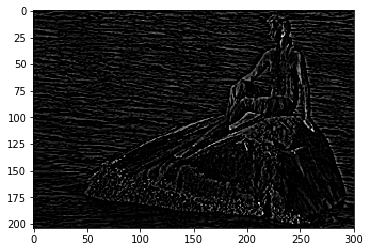

<Figure size 720x720 with 0 Axes>

In [16]:
%matplotlib inline
import numpy as np
from scipy import ndimage
import matplotlib.pyplot as plt
from imageio import imread
import cv2

image = imread('images/mermaid.png')
gaussian = []  

gaussian_layer= image.copy() 


for i in range(3):
    gaussian_layer = cv2.pyrDown(gaussian_layer)
    gaussian.append(gaussian_layer)


laplacian = [gaussian[-1]] 
    
for i in range(2,0,-1):
  #  size = (gaussian[i - 1].shape[1], gaussian[i - 1].shape[0])
    size = (gaussian[i - 1].shape[1], gaussian[i - 1].shape[0])
    gaussian_expanded = cv2.pyrUp(gaussian[i], dstsize=size)
    laplacian_layer = cv2.subtract(gaussian[i-1], gaussian_expanded)
    laplacian.append(laplacian_layer)
    
for i in laplacian_layer:
    plt.imshow(laplacian_layer)
    
plt.figure(figsize=(10,10))
plt.gray()
# plt.imshow(pyramid_image)
plt.show()

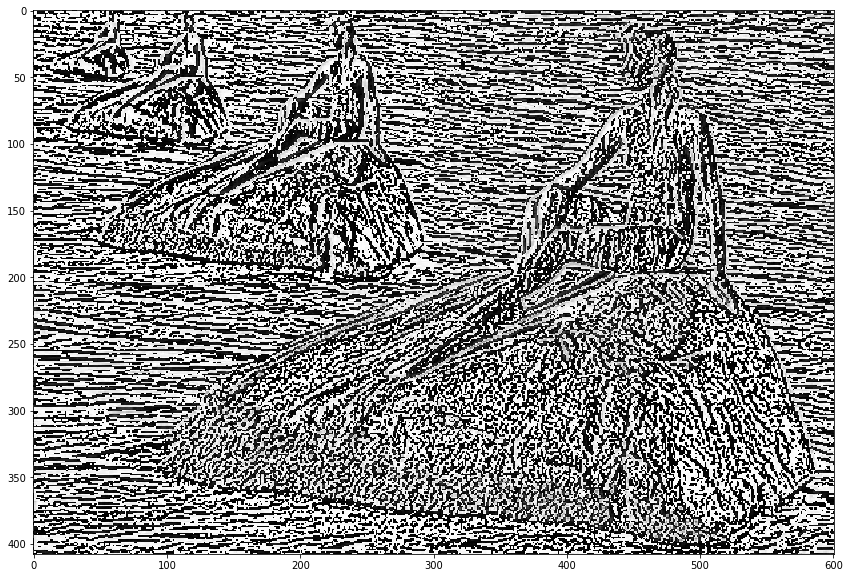

In [14]:
%matplotlib inline
import numpy as np
from scipy import ndimage
import matplotlib.pyplot as plt
from imageio import imread

img = imread('images/mermaid.png')

pyramid_image = np.zeros(img.shape)
binomial_filter = 1/256 * np.asarray([[1, 4, 6, 4, 1],
                                     [4, 16, 24, 16, 4],
                                     [6, 24, 36, 24, 6],
                                     [4, 16, 24, 16, 4],
                                     [1, 4, 6, 4, 1]])
steps = 4 # number of reduce-iteration

for i in range(steps) :
    # low pass filtering
    filtered_temp = ndimage.convolve(img, binomial_filter)
    # reduce(image)
    reduced_image = np.zeros(((img.shape[0]+1)//2, (img.shape[1]+1)//2), np.uint8)
    for x in range((img.shape[0]+1)//2) :
        for y in range((img.shape[1]+1)//2) :
            temp = np.array(filtered_temp[2*x][2*y])
            if (2*x+1<=img.shape[0]-1):
                np.append(temp, filtered_temp[2*x+1][2*y])            
                if (2*y+1<=img.shape[1]-1) :
                    np.append(temp, filtered_temp[2*x+1][2*y+1])
            else :
                np.append(temp, filtered_temp[2*x][2*y+1])  
            reduced_image[x][y] = temp.mean()
    # expand(reduce(image))
    exp_red_image = np.zeros((reduced_image.shape[0]*2, reduced_image.shape[1]*2), np.uint8)
    for x in range(reduced_image.shape[0]) : 
        for y in range(reduced_image.shape[1]) :
            exp_red_image[2*x][2*y] = reduced_image[x][y]
            exp_red_image[2*x][2*y+1] = reduced_image[x][y]
            exp_red_image[2*x+1][2*y] = reduced_image[x][y]
            exp_red_image[2*x+1][2*y+1] = reduced_image[x][y]
    # smoothing
    exp_red_image = ndimage.convolve(exp_red_image, binomial_filter)
    laplace = exp_red_image[:img.shape[0], :img.shape[1]] - img[:img.shape[0], :img.shape[1]]
    pyramid_image[:laplace.shape[0],:laplace.shape[1]] = laplace
    img = reduced_image

plt.figure(figsize=(15,10))
plt.gray()
plt.imshow(pyramid_image)
plt.show()

## Assignment 4: Region merging (5 points)

Implement the *region merging* algorithm (CV-07 slide 39) and apply it to the image `segments.png` (or some part of it). Use a simple *homogeneity condition*, e.g. that the maximal difference between gray values in a segment is not larger than a given threshold.

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: RuntimeWarning: overflow encountered in ubyte_scalars
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: overflow encountered in ubyte_scalars
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: RuntimeWarning: overflow encountered in ubyte_scalars
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in ubyte_scalars


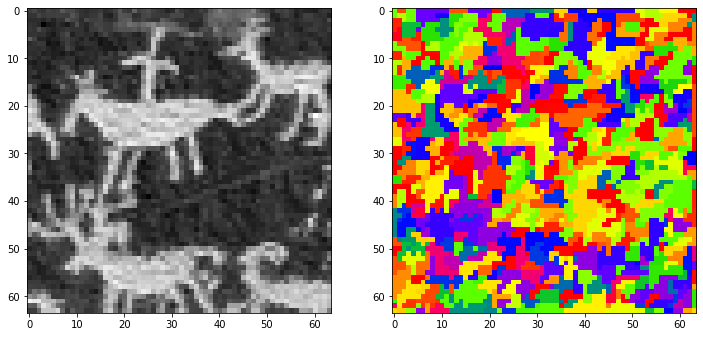

In [19]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from imageio import imread


img = imread('./images/segments.png', pilmode='L')
# Choosing a large image region lengthens computation time
img = img[64:128,64:128]
threshold = 50

# compute the `label` array by implementing "region merging"
label = np.empty(img.shape, np.int8)
trial = 500
while (trial) :
    for x in range(img.shape[0]) :
        for y in range(img.shape[1]) :
            if (x-1>0) :
                if abs(img[x,y]-img[x-1,y]) < threshold:
                    if not label[x,y]:
                        label[x,y] = img[x,y]
                    label[x-1,y] = label[x,y]
            if (y-1>0) :
                if abs(img[x,y]-img[x,y-1]) < threshold:
                    if not label[x,y]:
                        label[x,y] = img[x,y]
                    label[x,y-1] = label[x,y]
            if (y+1<img.shape[1]-1) :
                if abs(img[x,y]-img[x,y+1]) < threshold:
                    if not label[x,y]:
                        label[x,y] = img[x,y]
                    label[x,y+1] = label[x,y]
            if (x+1<img.shape[0]-1) :
                if abs(img[x,y]-img[x+1,y]) < threshold:
                    if not label[x,y]:
                        label[x,y] = img[x,y]
                    label[x+1,y] = label[x,y]
    trial -= 1;
    
plt.figure(figsize=(12, 12))
plt.gray()
plt.subplot(1,2,1)
plt.imshow(img)
plt.subplot(1,2,2)
plt.imshow(label, cmap='prism')
plt.show()